### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv('titanic.csv')

Show First 5 Rows

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dropping bad columns (Educated Guess)

In [4]:
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)

Describe Dataset

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Show Dtypes

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

Show How many Null Values

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Filling Columns that follow a normal distribution

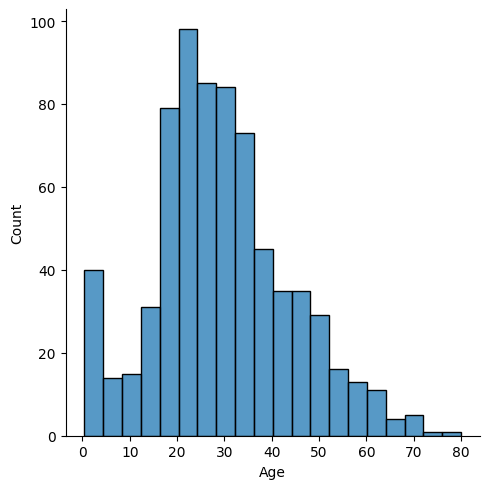

In [8]:
sns.displot(df['Age'])

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())

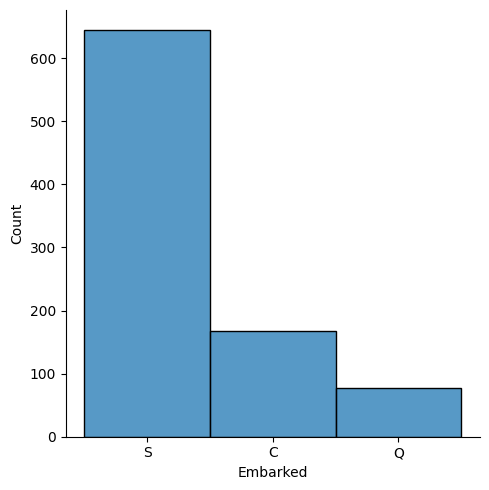

In [10]:
sns.displot(df['Embarked'])

In [11]:
df['Embarked']=df['Embarked'].fillna("S")

### Drop Columns with too many nulls

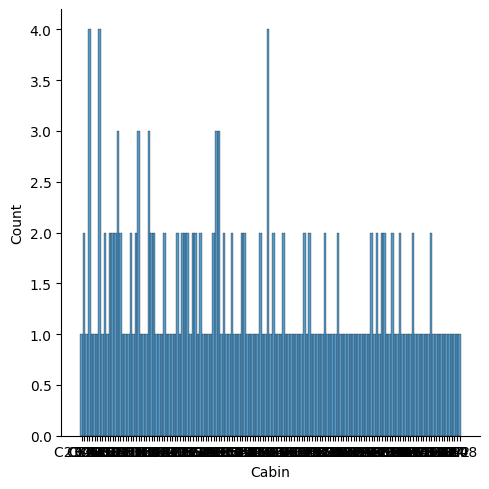

In [12]:
sns.displot(df['Cabin'])

In [13]:
df.drop("Cabin", axis=1, inplace=True)

### All Variables Fixed check 

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Change Strings to Numbers

Dataset Strings etc to numbers

In [15]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Check Correlations to find good features for prediction

Explorative Data Anaysis

<Axes: title={'center': 'Pearson Correlation of Features'}>

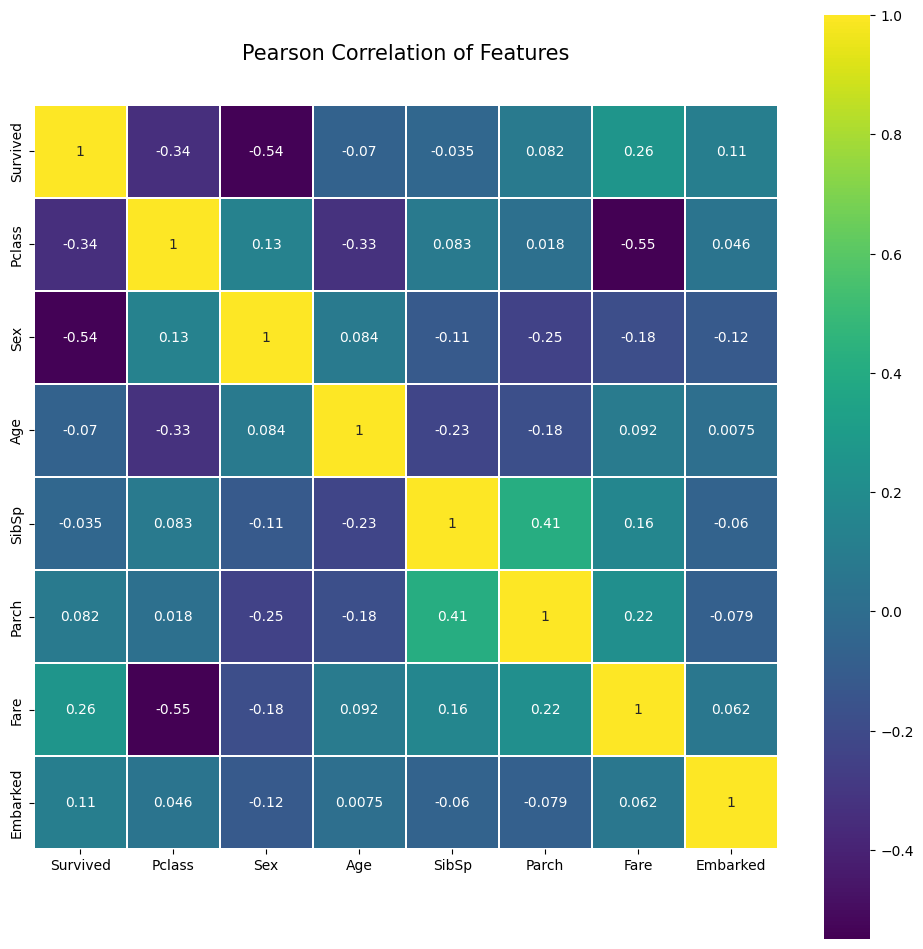

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
df_eda = df.copy()

### Drop elements that don't correlate with Y

In [18]:
df_eda.drop("Embarked", axis=1, inplace=True)
df_eda.drop("Parch", axis=1, inplace=True)
df_eda.drop("Age", axis=1, inplace=True)
df_eda.drop("Fare", axis=1, inplace=True)

## Build Classificator

### Build Datasets

In [19]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

In [20]:
full_train, full_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
filtered_train, filtered_test = train_test_split(df_eda, test_size=0.2, random_state=RANDOM_SEED)

In [21]:
full_y_train = full_train["Survived"]
full_x_train = full_train.drop("Survived", axis=1)

full_y_test = full_test["Survived"]
full_x_test = full_test.drop("Survived", axis=1)

In [22]:
filtered_y_train = filtered_train["Survived"]
filtered_x_train = filtered_train.drop("Survived", axis=1)

filtered_y_test = filtered_test["Survived"]
filtered_x_test = filtered_test.drop("Survived", axis=1)

### Build Classificator

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Tree

In [24]:
param_grid_tree = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree)

#### K Neighbors

In [25]:
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ["uniform", "distance"],
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"]
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn)

#### SVC

In [26]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [3, 5, 10],
    'gamma': ["scale", "auto"]
}
param_grid_svm = {
    'C': [0.1],
    'kernel': ["linear"],
    'degree': [3],
    'gamma': ["scale"]
}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm)

### Training

In [27]:
grid_search_list = [grid_search_tree, grid_search_knn, grid_search_svm]

for grid_search in grid_search_list:
    start = time.time()
    grid_search.fit(filtered_x_train, filtered_y_train)
    end = time.time()
    print(grid_search.best_params_)
    print("Time elapsed: ", round(end - start, 2),"s")
        

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Time elapsed:  4.7 s
{'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'uniform'}
Time elapsed:  1.57 s
{'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Time elapsed:  0.05 s


### Cross Val

In [28]:
from sklearn.model_selection import cross_validate

In [29]:
filtered_X = df_eda.drop("Survived", axis=1)
filtered_Y = df_eda["Survived"]

In [31]:
for grid_search in grid_search_list:
    scores = cross_validate(grid_search, filtered_X, filtered_Y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print("Accuracy: ", scores['test_accuracy'].mean())
    print("Precision: ", scores['test_precision'].mean())
    print("Recall: ", scores['test_recall'].mean())
    print("F1: ", scores['test_f1'].mean())
    print("")

Accuracy:  0.7979976147134519
Precision:  0.8117207382781153
Recall:  0.6199062233589088
F1:  0.7009308017164854

Accuracy:  0.7935220639005712
Precision:  0.8080378703797126
Recall:  0.6081841432225064
F1:  0.692883894061423

Accuracy:  0.7867365513778168
Precision:  0.7413210457575212
Recall:  0.6811594202898551
F1:  0.7092684925689027



Accuracy: This measures the overall correctness of the model and is defined as the ratio of true predictions (both true positives and true negatives) to the total number of cases examined. High accuracy means the model correctly predicts both positive and negative outcomes.

Precision: Precision assesses the accuracy of the positive predictions. It is defined as the ratio of true positives (correct positive predictions) to all predicted positives (true positives + false positives). High precision indicates that when the model predicts a positive result, it is likely correct.

Recall (Sensitivity): Recall measures the model’s ability to identify all relevant instances. It is defined as the ratio of true positives to all actual positives (true positives + false negatives). High recall means the model correctly identifies a large proportion of actual positives.

F1 Score: The F1 score is the harmonic mean of precision and recall. It is a balanced measure that takes both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. High F1 scores suggest a robust model with a good balance between precision and recall.